In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import data set
data=pd.read_csv('/content/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Apply EDA & Data visualization

In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
data[data.duplicated()].shape

(0, 2)

Text(0.5, 1.0, 'Salary Hike')

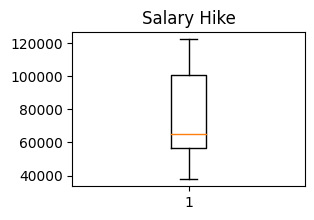

In [ ]:
#plotting outliers
plt.subplots(figsize=(3,2))
plt.boxplot(data['Salary'])
plt.title('Salary Hike')


Text(0.5, 1.0, 'Year of Experience')

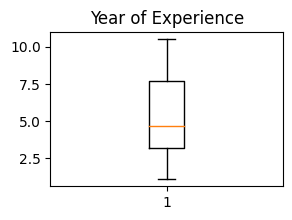

In [ ]:
plt.subplots(figsize=(3,2))
plt.boxplot(data['YearsExperience'])
plt.title('Year of Experience')

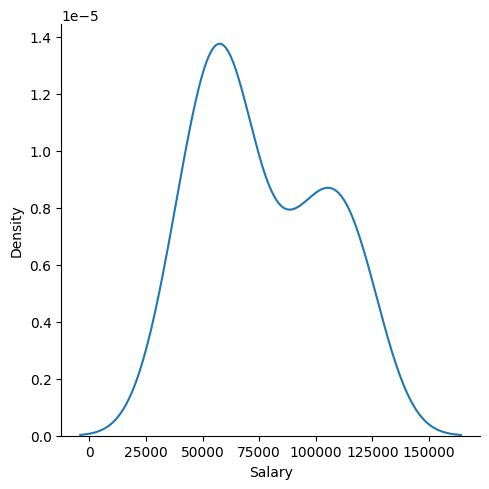

In [ ]:
sns.displot(data['Salary'],kind='kde')

Transformation of data to estimate normal disribution & remove skewness

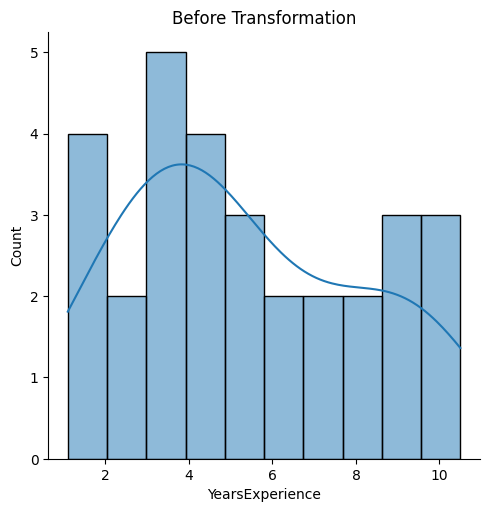

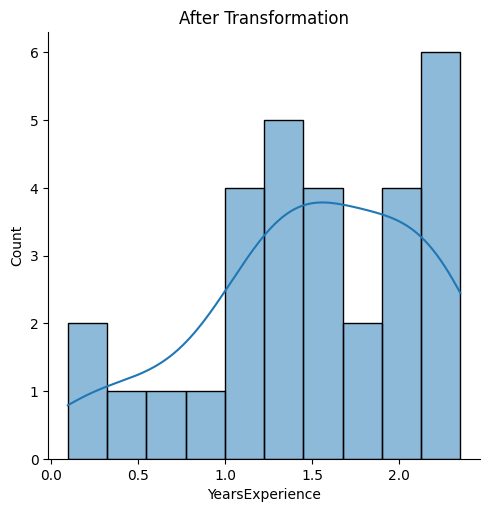

In [ ]:
sns.displot(data['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

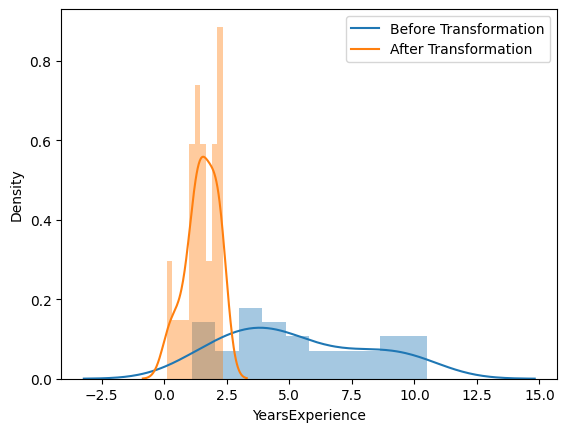

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

In [ ]:
#Log transformation affects data  & it scales the value down

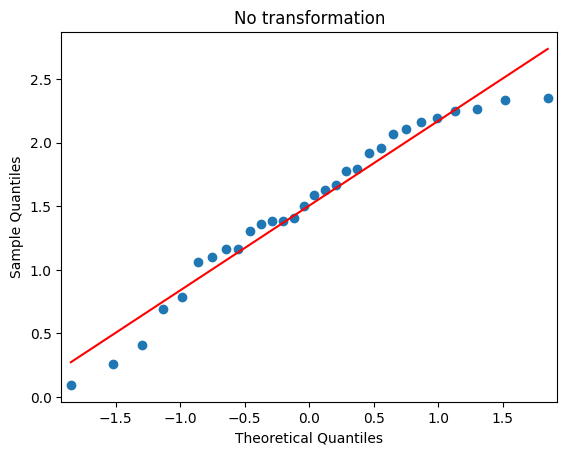

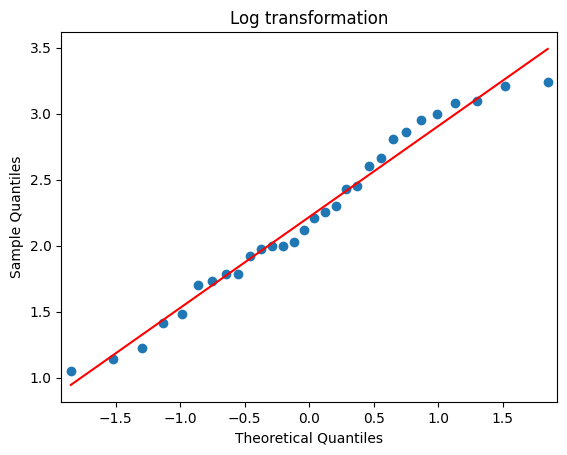

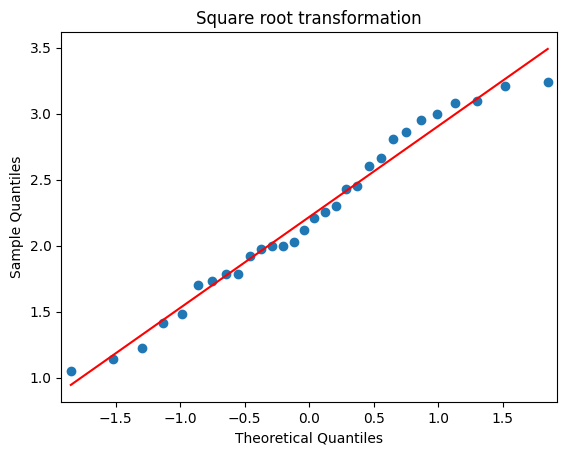

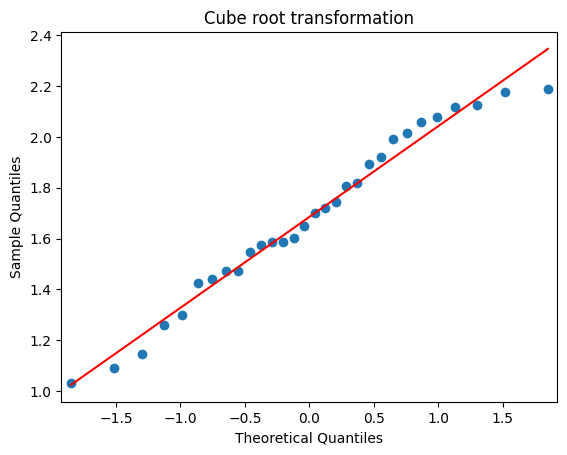

In [ ]:
smf.qqplot(np.log(data['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

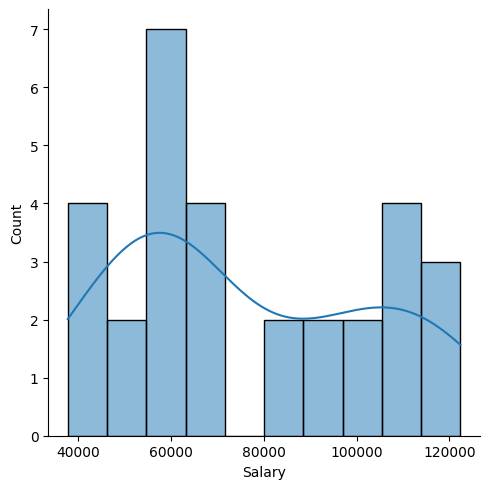

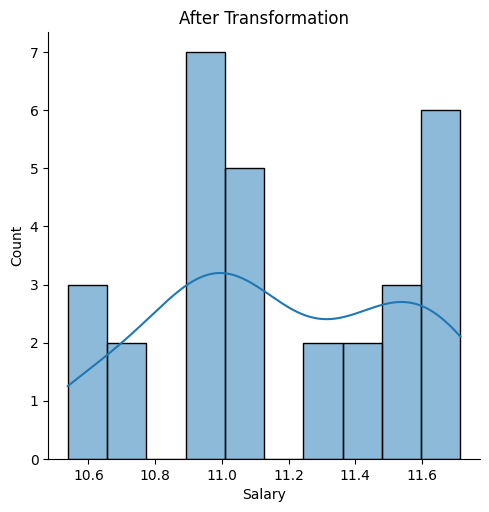

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.displot(data['Salary'], bins = 10, kde = True)
sns.displot(np.log(data['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

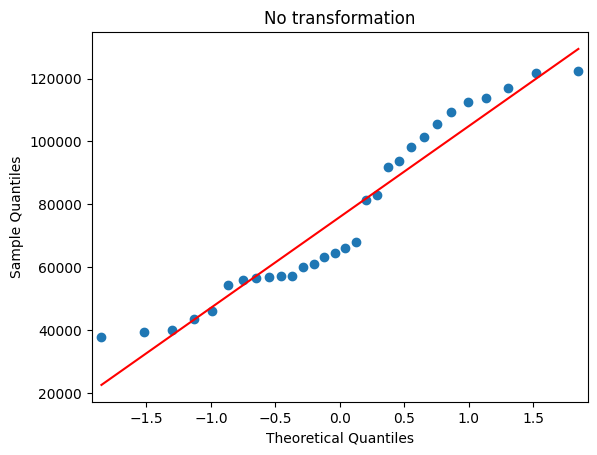

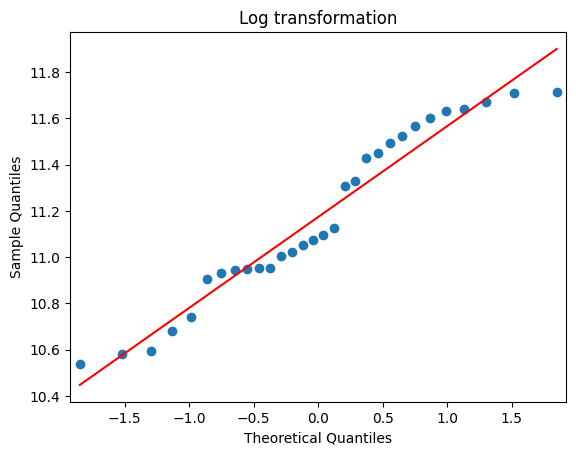

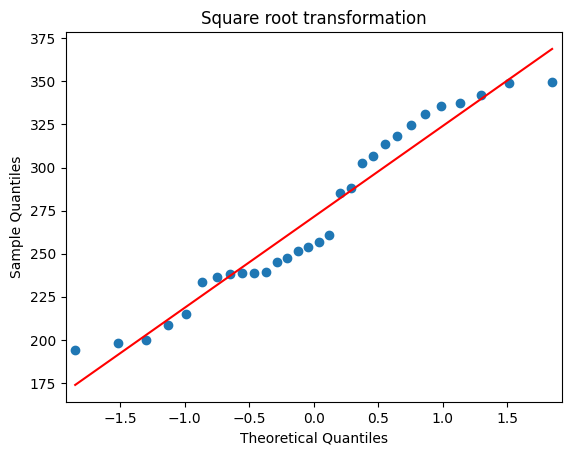

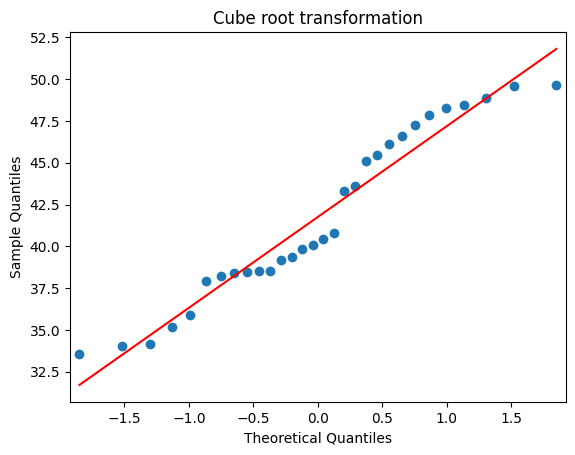

In [ ]:
smf.qqplot(data['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

Correlation Analysis


Fitting Linear Regression Model

In [ ]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = data).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        11:06:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#find coeffiecient B0 & B1
model.params 

#B0=2592.200 B1=9449.96
#Regression eqn: Salary=B0+B1*Years experience
#Salary= 25792.200+ 9449.96*Years experience

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
#Finding Rsquared values
model.rsquared,model.rsquared_adj
 
#R square values-0.95 it means excellent regression eqn

(0.9569566641435086, 0.9554194021486339)

Model Prediction

In [ ]:
#Manual Prediction for5 years
Salary= (25792.200)+(9449.96*5)
Salary

73042.0

In [ ]:
#Automatic prediction for 5 &7yrs
new_data=pd.Series([5,7])
new_data

0    5
1    7
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,7


In [ ]:
model.predict(data_pred)

0    73042.011806
1    91941.936449
dtype: float64